# 검증셋
* model.fit에서 validation_split옵션을 주면 검증셋이 알아서 나눠진다.
* callback으로 earlystop, checkpointer를 사용해, 과적합 되기 전에 멈추고 최적의 모델만 저장한다.


이 노트에서는 주로 'val_loss'를 모니터 지표로 삼아 실행했다

In [1]:
import pandas as pd

!git clone https://github.com/taehojo/data.git

df = pd.read_csv('./data/wine.csv', header=None)

df

Cloning into 'data'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 29 (delta 6), reused 20 (delta 2), pack-reused 0 (from 0)
Receiving objects: 100% (29/29), 467.72 KiB | 1.83 MiB/s, done.
Resolving deltas: 100% (6/6), done.


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split

X = df.iloc[:,0:12]
y = df.iloc[:,12]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=True)

In [18]:
model = Sequential()
model.add(Input(shape=(12,)))
model.add(Dense(30, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 30)                  │             390 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 12)                  │             372 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 875 (3.42 KB)

 Trainable params: 875 (3.42 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
history = model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25)
score = model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.7255 - loss: 0.4898 - val_accuracy: 0.7823 - val_loss: 0.3986
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8034 - loss: 0.3832 - val_accuracy: 0.8892 - val_loss: 0.3286
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8933 - loss: 0.3165 - val_accuracy: 0.9115 - val_loss: 0.2834
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9090 - loss: 0.2832 - val_accuracy: 0.9215 - val_loss: 0.2660
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9203 - loss: 0.2752 - val_accuracy: 0.9223 - val_loss: 0.2491
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9147 - loss: 0.2650 - val_accuracy: 0.9246 - val_loss: 0.2388
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9167 - loss: 0.2542 - val_accuracy: 0.9254 - val_loss: 0.2316
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9185 - loss: 0.2436 - val_accuracy: 0.9254 - val_loss: 0.2275
Epoch 

In [8]:
modelpath = "./data/model/all/{epoch:02d}-{val_accuracy:.4f}.keras"

from tensorflow.keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)

history = model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25, verbose=0, callbacks=[checkpointer])

score = model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])


Epoch 1: saving model to ./data/model/all/01-0.9654.keras

Epoch 2: saving model to ./data/model/all/02-0.9646.keras

Epoch 3: saving model to ./data/model/all/03-0.9654.keras

Epoch 4: saving model to ./data/model/all/04-0.9615.keras

Epoch 5: saving model to ./data/model/all/05-0.9623.keras

Epoch 6: saving model to ./data/model/all/06-0.9638.keras

Epoch 7: saving model to ./data/model/all/07-0.9631.keras

Epoch 8: saving model to ./data/model/all/08-0.9646.keras

Epoch 9: saving model to ./data/model/all/09-0.9662.keras

Epoch 10: saving model to ./data/model/all/10-0.9662.keras

Epoch 11: saving model to ./data/model/all/11-0.9638.keras

Epoch 12: saving model to ./data/model/all/12-0.9662.keras

Epoch 13: saving model to ./data/model/all/13-0.9669.keras

Epoch 14: saving model to ./data/model/all/14-0.9677.keras

Epoch 15: saving model to ./data/model/all/15-0.9669.keras

Epoch 16: saving model to ./data/model/all/16-0.9662.keras

Epoch 17: saving model to ./data/model/all/17-0.

In [9]:
hist_df = pd.DataFrame(history.history)
hist_df

,accuracy,loss,val_accuracy,val_loss
0,0.966898,0.100071,0.965385,0.101000
1,0.966128,0.099959,0.964615,0.096011
2,0.965871,0.100305,0.965385,0.095794
3,0.965615,0.100522,0.961538,0.097941
4,0.964845,0.102032,0.962308,0.108237
...,...,...,...,...
1995,0.994611,0.020354,0.990769,0.047235
1996,0.994868,0.018525,0.992308,0.048523
1997,0.994868,0.017725,0.990000,0.047660
1998,0.995638,0.017253,0.990769,0.049825


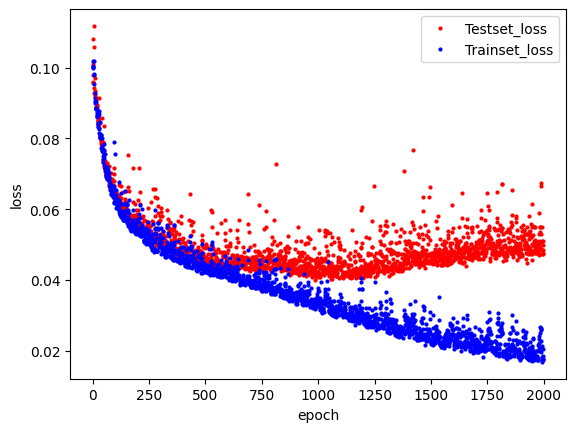

In [15]:
import numpy as np
import matplotlib.pyplot as plt

y_vloss = hist_df['val_loss']
y_loss = hist_df['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, "o", c="red", markersize=2, label='Testset_loss')
plt.plot(x_len, y_loss, "o", c="blue", markersize=2, label="Trainset_loss")

plt.legend(loc="upper right")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [19]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

modelpath = "./data/model/bestmodel.keras"

checkpointer=ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose = 0, save_best_only=True)

history = model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split = 0.25, verbose = 1, callbacks=[early_stopping_callback, checkpointer])

Epoch 1/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.7504 - loss: 1.9513 - val_accuracy: 0.7492 - val_loss: 1.1042
Epoch 2/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7610 - loss: 0.9044 - val_accuracy: 0.7492 - val_loss: 0.5216
Epoch 3/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7304 - loss: 0.5689 - val_accuracy: 0.7492 - val_loss: 0.4329
Epoch 4/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7562 - loss: 0.4426 - val_accuracy: 0.7477 - val_loss: 0.4162
Epoch 5/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7568 - loss: 0.4194 - val_accuracy: 0.8115 - val_loss: 0.3514
Epoch 6/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8273 - loss: 0.3725 - val_accuracy: 0.8792 - val_loss: 0.3256
Epoch 7/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8709 - loss: 0.3270 - val_accuracy: 0.8900 - val_loss: 0.3055
Epoch 8/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8817 - loss: 0.3174 - val_accuracy: 0.9146 - val_

In [21]:
score = model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9830 - loss: 0.0461
Test accuracy: 0.986923098564148
